In [22]:
# Figure S10

In [23]:
import warnings

import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import cmaps 
from gcpy import single_panel
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import regionmask
import seaborn as sns 
from scipy import stats 
import xarray as xr 

from src import tools

warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Load Emissions
ref_ds_emis = xr.open_dataset("/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_public/GCHP.all_ref_c48.Emissions.april-august.nc4")
refshort_ds_emis = xr.open_dataset("/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_public/GCHP.all_refshort_c48.Emissions.april-august.nc4")

# Load SpeciesConc
ref_ds_spec = xr.open_dataset("/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_public/GCHP.all_ref_c48.SpeciesConc.april-august.nc4")
refshort_ds_spec = xr.open_dataset("/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_public/GCHP.all_refshort_c48.SpeciesConc.april-august.nc4")


In [25]:
# Extract ozone season only
months = [4,5,6,7,8]
ref_ds_emis_selected = ref_ds_emis.sel(time=ref_ds_emis.time.dt.month.isin(months))
refshort_ds_emis_selected = refshort_ds_emis.sel(time=refshort_ds_emis.time.dt.month.isin(months))
ref_ds_spec_selected = ref_ds_spec.sel(time=ref_ds_spec.time.dt.month.isin(months))
refshort_ds_spec_selected = refshort_ds_spec.sel(time=refshort_ds_spec.time.dt.month.isin(months))

In [26]:
# Rename variables for use later
rsSPEC = refshort_ds_spec_selected
rSPEC = ref_ds_spec_selected

rsEMIS = refshort_ds_emis_selected
rEMIS = ref_ds_emis_selected

In [27]:
# Extract time-averaged soil NO and biogenic isoprene emissions rates
ref_soilNO = rEMIS['EmisNO_Soil'].mean(dim=['sim','time'])
refshort_soilNO = rsEMIS['EmisNO_Soil'].mean(dim=['sim','time'])

ref_bioISOP = rEMIS['EmisISOP_Biogenic'].mean(dim=['sim','time'])
refshort_bioISOP = rsEMIS['EmisISOP_Biogenic'].mean(dim=['sim','time'])

# Extract time-averaged PAN, HO2, and OH mixing ratios
ref_PAN = rSPEC['SpeciesConc_PAN'].mean(dim=['sim','time'])
refshort_PAN = rsSPEC['SpeciesConc_PAN'].mean(dim=['sim','time'])

ref_OH = rSPEC['SpeciesConc_OH'].mean(dim=['sim','time'])
refshort_OH = rsSPEC['SpeciesConc_OH'].mean(dim=['sim','time'])

ref_HO2 = rSPEC['SpeciesConc_HO2'].mean(dim=['sim','time'])
refshort_HO2 = rsSPEC['SpeciesConc_HO2'].mean(dim=['sim','time'])

# Define HOx = OH + HO2
ref_HOx = ref_OH + ref_HO2
refshort_HOx = refshort_OH + refshort_HO2

In [28]:
# Calculate absolute difference 
# 1000g/kg * (14/30) kgN/kgNO * 86400 s/day * 153 April-August days/year
scale_factor = 1000 * (14/30) * 86400 * 153
abs_diff_soilNO = (refshort_soilNO-ref_soilNO) * scale_factor
abs_diff_soilNO.attrs['units'] = 'gN/m2/yr' 

# 1000g/kg * (60.06/68.12) kgC/kgISOP * 86400 s/day * 153 April-August days/year
scale_factor = 1000 * (60.06/68.12)  * 86400 * 153
abs_diff_bioISOP = (refshort_bioISOP-ref_bioISOP) * scale_factor
abs_diff_bioISOP.attrs['units'] = 'gC/m2/yr'

abs_diff_PAN = (refshort_PAN-ref_PAN) * 1e9
abs_diff_PAN.attrs['units'] = 'ppbv' 

abs_diff_HOx = (refshort_HOx-ref_HOx) * 1e12
abs_diff_HOx.attrs['units'] = 'pptv'  

In [29]:
# Print to set cbar lims
print(abs_diff_soilNO.max())
print(abs_diff_soilNO.min())

print(abs_diff_bioISOP.max())
print(abs_diff_bioISOP.min())

print(abs_diff_PAN.max())
print(abs_diff_PAN.min())

print(abs_diff_HOx.max())
print(abs_diff_HOx.min())


<xarray.DataArray 'EmisNO_Soil' ()>
array(0.11594319)
<xarray.DataArray 'EmisNO_Soil' ()>
array(-0.02402262)
<xarray.DataArray 'EmisISOP_Biogenic' ()>
array(0.86675662)
<xarray.DataArray 'EmisISOP_Biogenic' ()>
array(-3.55663943)
<xarray.DataArray 'SpeciesConc_PAN' ()>
array(0.0187286)
<xarray.DataArray 'SpeciesConc_PAN' ()>
array(-0.18528062)
<xarray.DataArray ()>
array(2.79135132)
<xarray.DataArray ()>
array(-0.83349907)


In [30]:
# Calculate percent difference 
pct_diff_soilNO = ((refshort_soilNO-ref_soilNO)/ref_soilNO) * 100
pct_diff_soilNO.attrs['units'] = '% change' # range: 0-100

pct_diff_bioISOP = ((refshort_bioISOP-ref_bioISOP)/ref_bioISOP) * 100
pct_diff_bioISOP.attrs['units'] = '% change' # range: 0-100

pct_diff_PAN = ((refshort_PAN-ref_PAN)/ref_PAN) * 100
pct_diff_PAN.attrs['units'] = '% change' # range: 0-100

pct_diff_HOx = ((refshort_HOx-ref_HOx)/ref_HOx) * 100
pct_diff_HOx.attrs['units'] = '% change' # range: 0-100

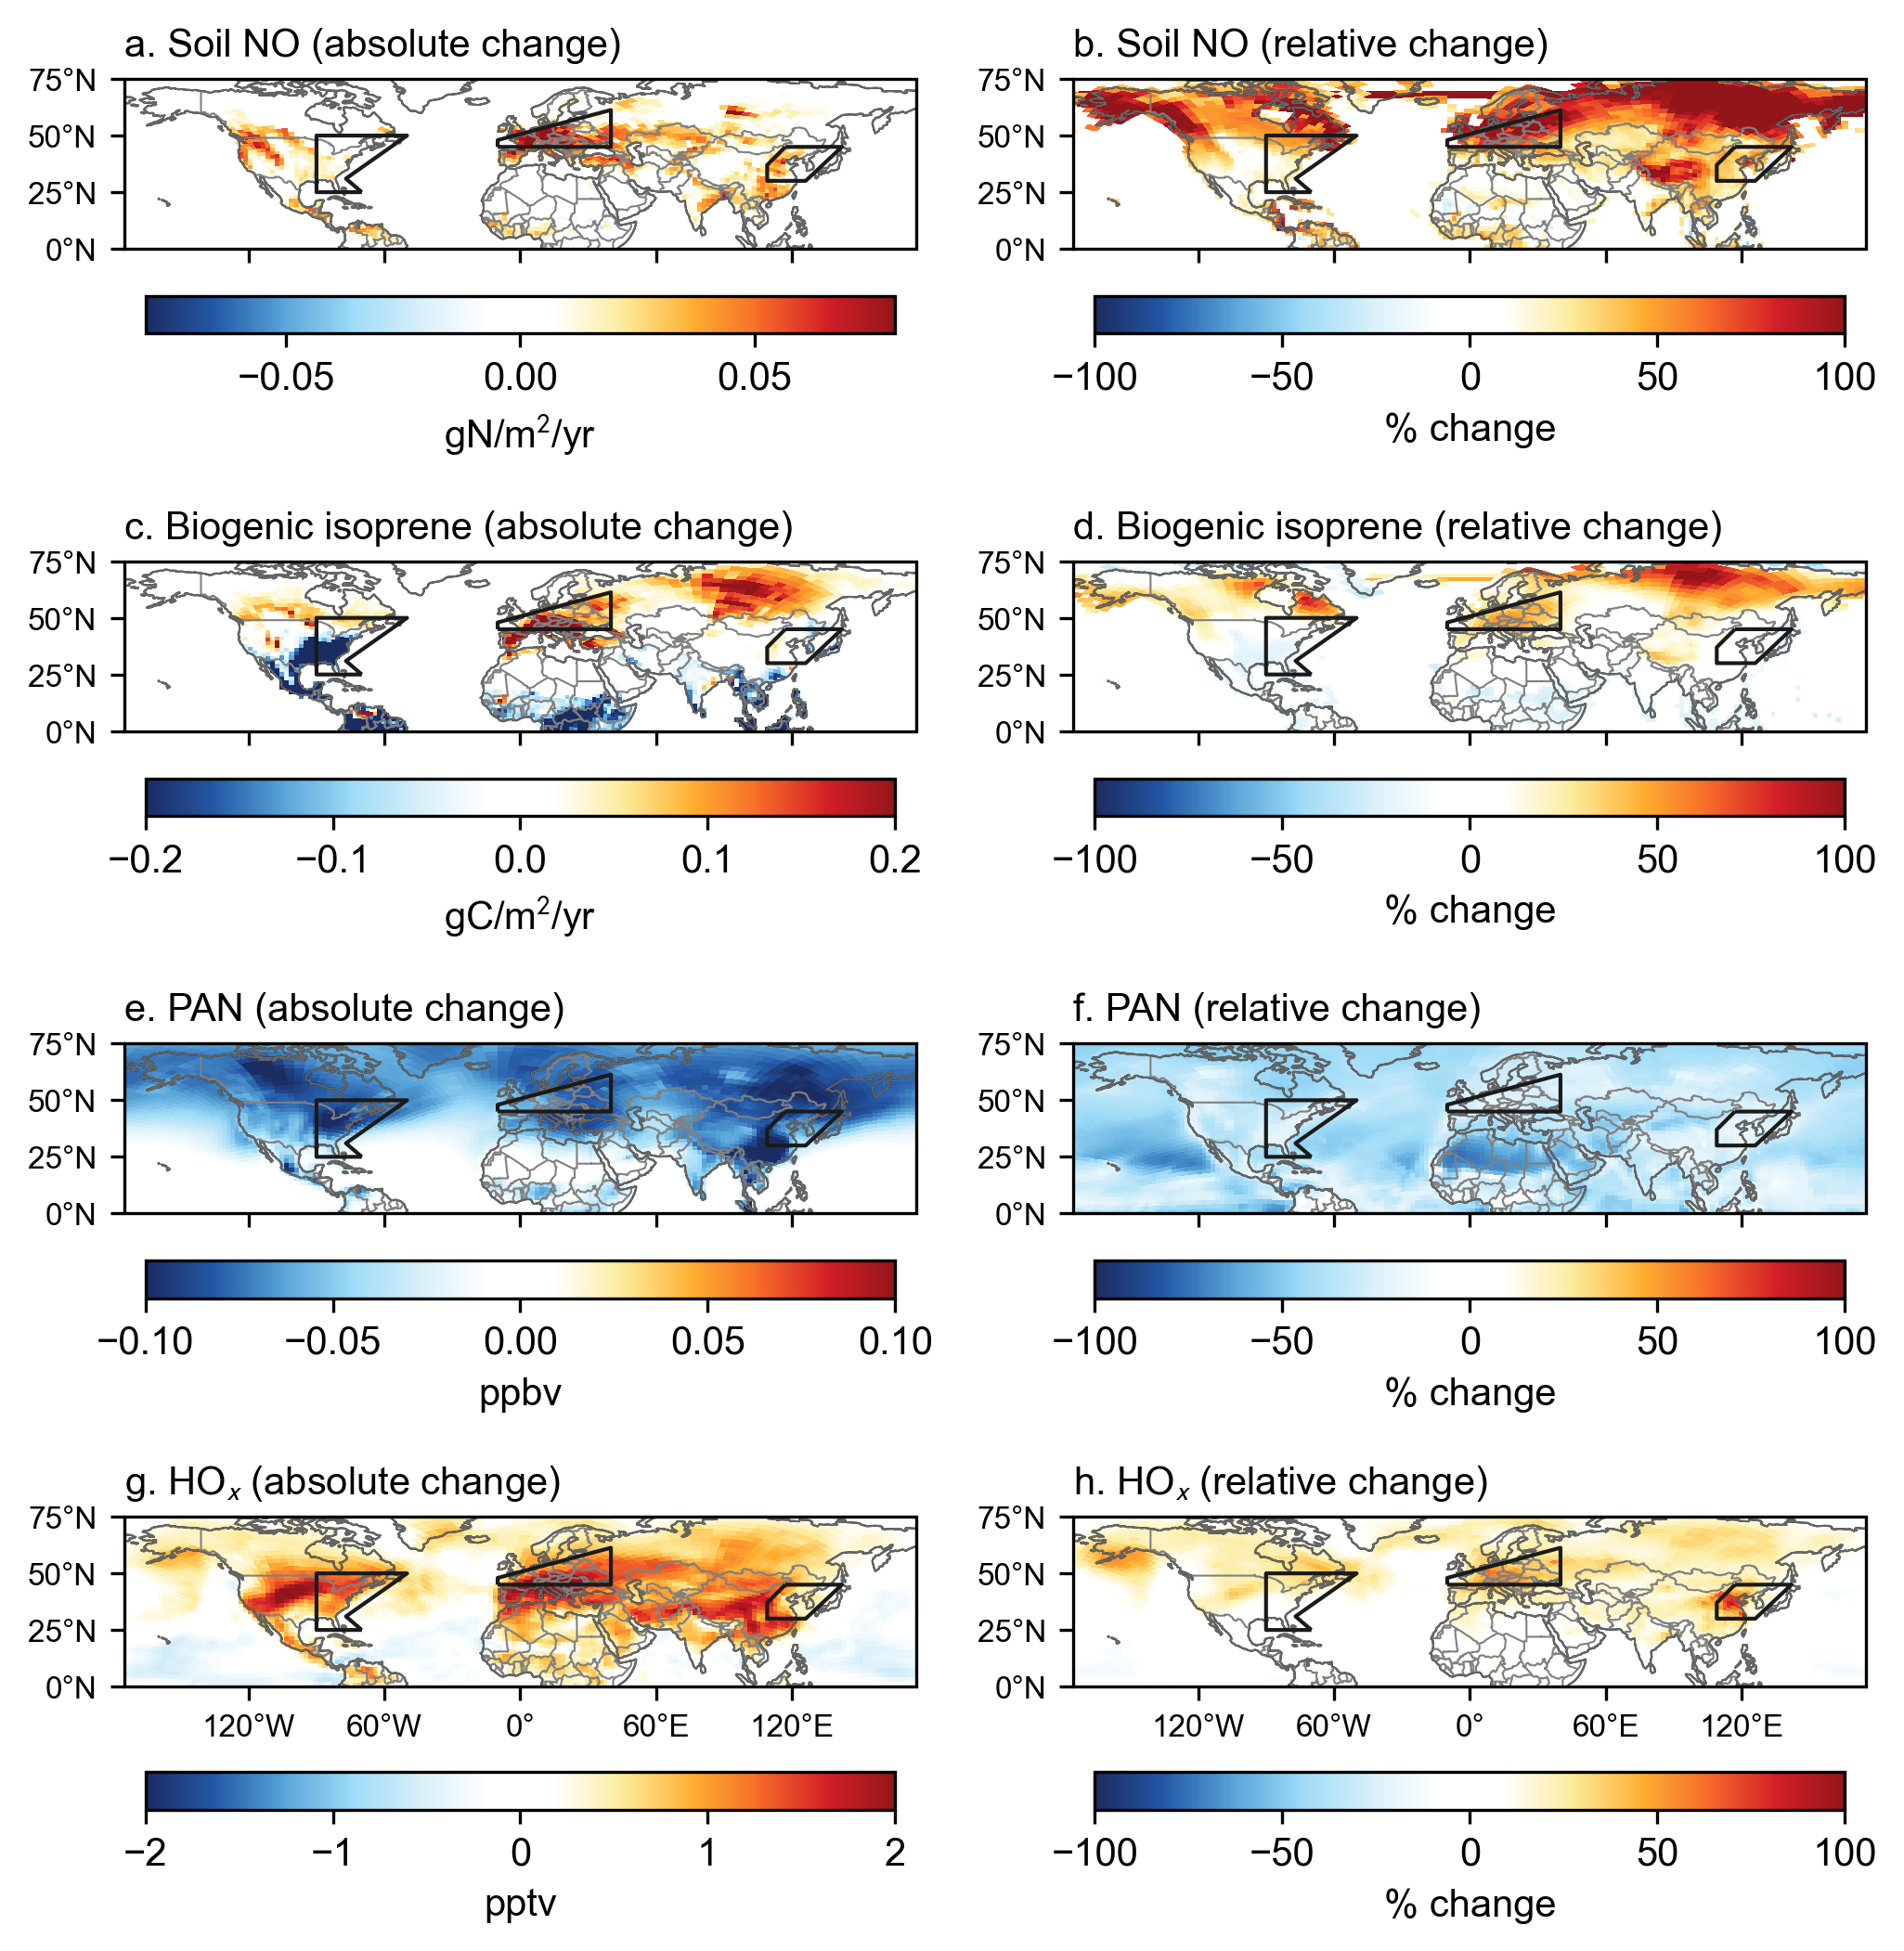

In [33]:
tools.set_matplotlib_font("Arial")
fig, ax = plt.subplots(
        dpi=300,
        figsize=(6.8,7),
        sharex=False, sharey=True,
        nrows=4, ncols=2,
        constrained_layout=True,
        subplot_kw={"projection": ccrs.PlateCarree()}
    )
ax = ax.flatten()
titles= ["a. Soil NO (absolute change)",  "b. Soil NO (relative change)", 
        "c. Biogenic isoprene (absolute change)",  "d. Biogenic isoprene (relative change)", 
        "e. PAN (absolute change)",  "f. PAN (relative change)",
         "g. HO$_x$ (absolute change)",  "h. HO$_x$ (relative change)"]

vmins = [-0.08, -100, -0.2, -100, -0.1, -100, -2, -100]
vmaxs = [0.08, 100, 0.2, 100, 0.1, 100, 2, 100]
units = ['gN/m$^2$/yr', '% change', 'gC/m$^2$/yr', '% change', 'ppbv', '% change', 'pptv', '% change']
cmap = cmaps.BlueWhiteOrangeRed
extend = ['both', 'neither', 'both', 'neither', 'both', 'neither', 'both', 'neither']
for idx, z in enumerate([abs_diff_soilNO, 
                         pct_diff_soilNO,
                         abs_diff_bioISOP, 
                         pct_diff_bioISOP,
                         abs_diff_PAN, 
                         pct_diff_PAN,
                         abs_diff_HOx,
                         pct_diff_HOx]):

    # Plot
    plot = single_panel(plot_vals=z, 
                ax=ax[idx], gridtype="cs", 
                comap=cmap,
                extent=(-175, 175, 0, 75), 
                vmin=vmins[idx], vmax=vmaxs[idx],
                unit=units[idx],
                title=None,
                add_cb=True,

)

    # Mapping features
    ax[idx].coastlines(linewidth=0.5)
    country_borders = cfeature.NaturalEarthFeature(
        category="cultural",
        name="admin_0_boundary_lines_land",
        scale="50m",
        facecolor="none",
    )
    ax[idx].add_feature(country_borders, edgecolor="gray", linewidth=0.5)
    ax[idx].set_extent([-175, 175, 0, 75], crs=ccrs.PlateCarree())
    ax[idx].set_title(titles[idx], loc='left', size=10)

    if idx > 5: # bottom panels have xticklabels
        ax[idx].set_xticks([-120, -60, 0, 60, 120])
        ax[idx].set_xticklabels(
            ['120°W', '60°W', '0°', '60°E', '120°E'], fontsize=8)
        ax[idx].set_yticks([0,25,50,75])
        ax[idx].set_yticklabels(
            ['0°N', '25°N', '50°N', '75°N'], fontsize=8)
    else:
        ax[idx].set_xticks([-120, -60, 0, 60, 120])
        ax[idx].set_xticklabels(['', '', '', '', ''], fontsize=8)
        ax[idx].set_yticks([0,25,50,75])
        ax[idx].set_yticklabels(
            ['0°N', '25°N', '50°N', '75°N'], fontsize=8)

    # Add boxes around the IPCC AR6 regions
    ar6 = regionmask.defined_regions.ar6.all
    ar6[5,17].plot(ax=ax[idx],
        add_ocean=False,
        projection=ccrs.PlateCarree(),
        add_label=False,
        line_kws=dict(lw=1)
    )

    # For EAS we use a modified polygon that captures a more homogeneous response
    new_EAS = np.array([[117,45], [109,37], [109,30], [126,30],[142,45]])
    new_EAS_region = regionmask.Regions([new_EAS], name="new_EAS")
    new_EAS_region.plot_regions(add_label=False, ax=ax[idx], line_kws=dict(lw=1))

##########
plt.savefig("FigS10_new.png")
